<a href="https://colab.research.google.com/github/NIKITACHOKHARIYA/MLP/blob/main/kmeans_alo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fd=pd.read_csv('/content/data_data.csv')
fd.head()

,Name,Age,Income
0,Sophia,26,42000
1,John,39,88000
2,John,36,95000
3,Daniel,48,73000
4,Olivia,54,96000


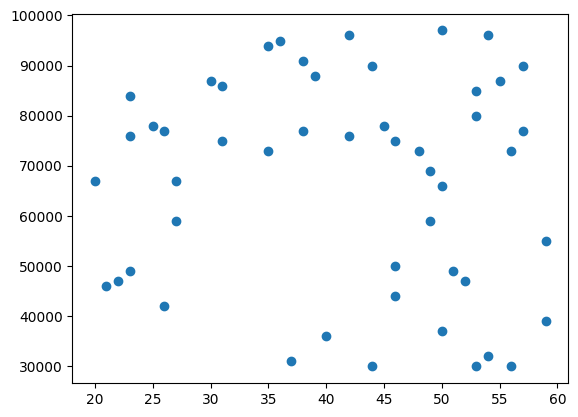

In [ ]:
plt.scatter(fd['Age'],fd['Income'])
plt.show()

In [ ]:
fd['Age'].value_counts()

Age
46    3
23    3
50    3
53    3
26    2
35    2
57    2
27    2
38    2
59    2
56    2
44    2
49    2
54    2
31    2
42    2
40    1
25    1
52    1
36    1
21    1
48    1
30    1
51    1
37    1
45    1
55    1
20    1
39    1
22    1
Name: count, dtype: int64

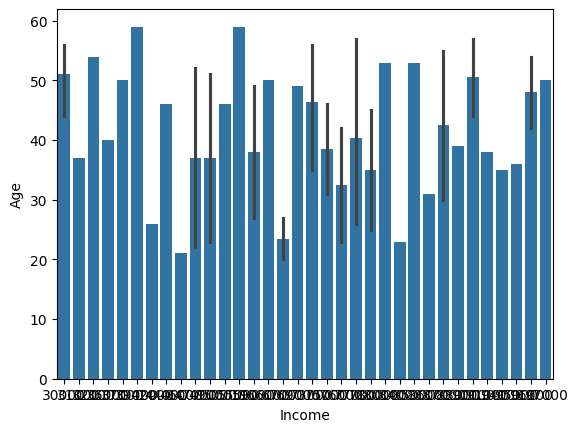

In [ ]:
sns.barplot(y='Age',x='Income',data=fd)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km=KMeans(n_clusters=3)
km.fit(fd[['Age','Income']])
y_pred=km.predict([[41,'105000']])
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scal=MinMaxScaler() # initializes an instance
scal.fit(fd[['Income']]) # calculates the minimum and maximum values of the 'Income' column, which are then used for scaling
fd['Income']=scal.transform(fd[['Income']])#the minimum and maximum values calculated during the fitting step
scal.fit(fd[['Age']])
fd['Age']=scal.transform(fd[['Age']])

In [ ]:
fd.head()

,Name,Age,Income
0,Sophia,0.153846,0.179104
1,John,0.487179,0.865672
2,John,0.410256,0.970149
3,Daniel,0.717949,0.641791
4,Olivia,0.871795,0.985075


In [ ]:
pred_y=km.fit_predict(fd[['Age','Income']])
pred_y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1,
       0, 0, 2, 2, 2, 1], dtype=int32)

In [ ]:
fd['cluster']=pred_y
fd

,Name,Age,Income,cluster
0,Sophia,0.153846,0.179104,2
1,John,0.487179,0.865672,0
2,John,0.410256,0.970149,0
3,Daniel,0.717949,0.641791,0
4,Olivia,0.871795,0.985075,0
5,Emma,0.435897,0.014925,1
6,Michael,0.641026,0.716418,0
7,Emma,0.282051,0.835821,2
8,Olivia,0.000000,0.552239,2
9,Michael,0.564103,0.985075,0


In [ ]:
km.cluster_centers_
#each data point belongs to the cluster with the nearest mean (centroid)

array([[0.69230769, 0.7981521 ],
       [0.76190476, 0.15884861],
       [0.15384615, 0.560199  ]])

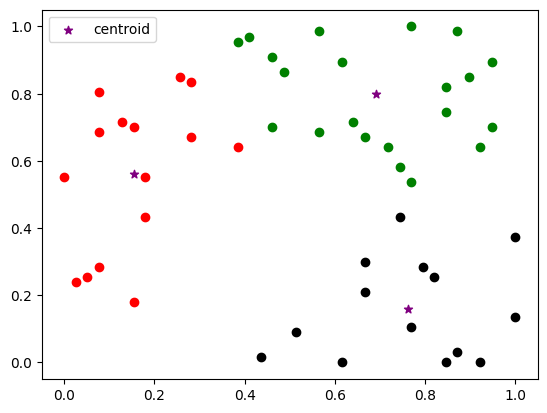

In [ ]:
fd1=fd[fd.cluster==0]#craete a new dataframe to assign specific cluster
fd2=fd[fd.cluster==1]
fd3=fd[fd.cluster==2]
plt.scatter(fd1.Age,fd1['Income'],color='green')#craete plot of the data point of each cluster
plt.scatter(fd2.Age,fd2['Income'],color='black')
plt.scatter(fd3.Age,fd3['Income'],color='red')
# plt.scatter(km.cluster_centers_[;0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#above line add the scatter plot marker for the centroid cluster
plt.legend()#labeling the differnt elements
plt.show()
